In [44]:
%matplotlib inline

In [45]:
import numpy as np
from astropy import units as u

In [46]:
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)

In [47]:
import sys
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show

In [48]:
import os
os.chdir("/lustre/lard/projects/ALMA_IMF/2017.1.01355.L/imaging_results")

In [49]:
ls -lhrtd W51-E_B6_uid___*_continuum_merged_7M12M*.image.tt0

drwxr-xr-x 4 aginsbur observer 4.0K Feb 26 18:55 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust-2_cleanest.image.tt0/
drwxr-xr-x 4 aginsbur observer 4.0K Feb 27 03:01 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust2_cleanest.image.tt0/
drwxr-xr-x 4 aginsbur observer 4.0K Feb 27 23:28 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust-2_bsens_dirty.image.tt0/
drwxr-xr-x 4 aginsbur observer 4.0K Mar  1 14:16 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust-2_bsens_shallow_pblimit.image.tt0/
drwxr-xr-x 4 aginsbur observer 4.0K Mar  3 04:51 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust-2_bsens_masked.image.tt0/
drwxr-xr-x 4 aginsbur observer 4.0K Mar 12 07:29 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust0_dirty.image.tt0/
drwxr-xr-x 4 aginsbur observer 4.0K Apr 25 22:23 W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust-2_bsens.image.tt0/
drwxr-xr-x 4 aginsbur observer 4.0K Apr 27 13:07 W51-E_B6_uid___

In [50]:
imgs_dirty_b6, cubes_dirty_b6 = load_images('W51-E_B6_uid___A001_X1296_X217_continuum_merged_7M12M_robust0_dirty')

In [51]:
imgs_before_b6, cubes_before_b6 = load_images('W51-E_B6_uid___A001_X1296_X217_continuum_merged_7M12M_robust0')

In [52]:
imgs_after_b6, cubes_after_b6 = load_images('W51-E_B6_uid___A001_X1296_X217_continuum_merged_7M12M_robust0_selfcal1')

In [53]:
imgs_after2_b6, cubes_after2_b6 = load_images('W51-E_B6_uid___A001_X1296_X217_continuum_merged_7M12M_robust0_selfcal2')

In [54]:
imgs_after3_b6, cubes_after3_b6 = load_images('W51-E_B6_uid___A001_X1296_X217_continuum_merged_7M12M_robust0_selfcal3')

In [55]:
imgs_after4_b6, cubes_after4_b6 = load_images('W51-E_B6_uid___A001_X1296_X217_continuum_merged_7M12M_robust0_selfcal4')

In [56]:
imgs_after5_b6, cubes_after5_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust0_selfcal5')

OSError: File W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust0_selfcal5.image.tt0 does not exist

In [ ]:
imgs_after6_b6, cubes_after6_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust0_selfcal6')

In the images below, the white contours show the region where the model is nonzero.

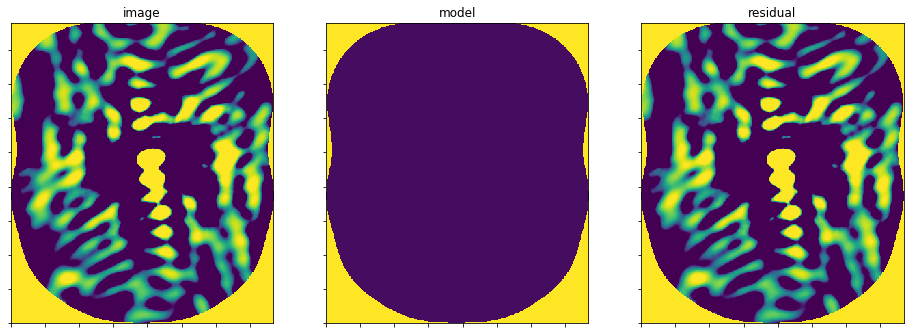

In [57]:
show(imgs_dirty_b6, vmin=-0.001, vmax=0.1)

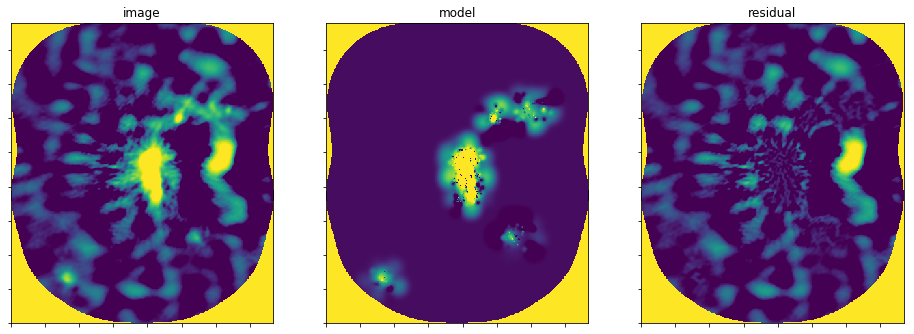

In [58]:
show(imgs_before_b6, vmin=-0.001, vmax=0.1)

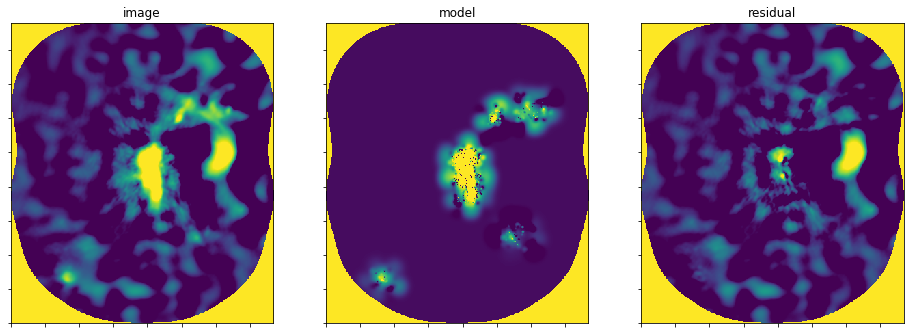

In [59]:
show(imgs_after_b6, vmin=-0.001, vmax=0.1)

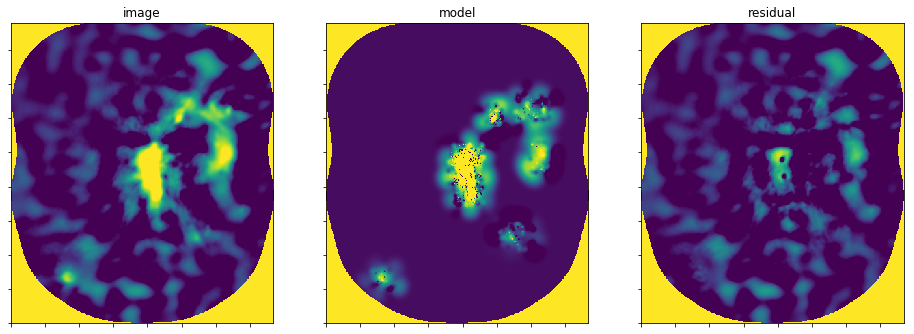

In [60]:
show(imgs_after2_b6, vmin=-0.001, vmax=0.1)

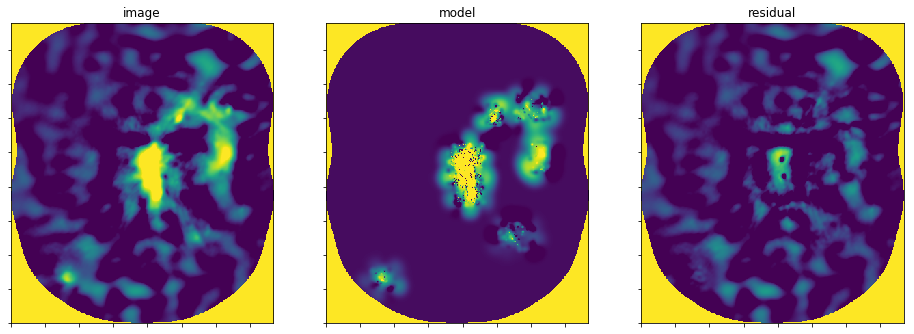

In [61]:
show(imgs_after3_b6, vmin=-0.001, vmax=0.1)

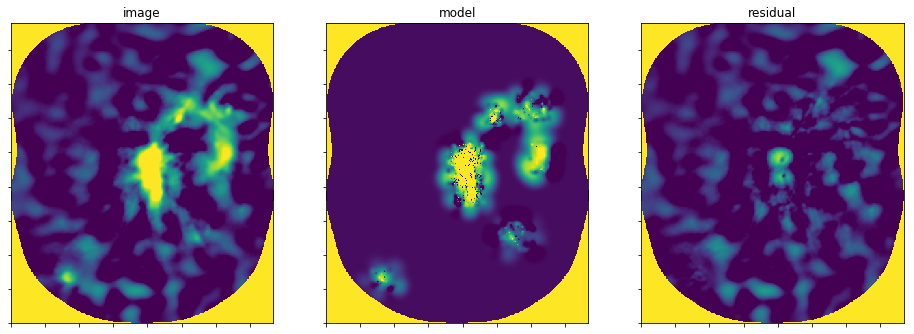

In [62]:
show(imgs_after4_b6, vmin=-0.001, vmax=0.1)

In [63]:
show(imgs_after5_b6, vmin=-0.001, vmax=0.01)

NameError: name 'imgs_after5_b6' is not defined

In [ ]:
show(imgs_after6_b6, vmin=-0.001, vmax=0.01)

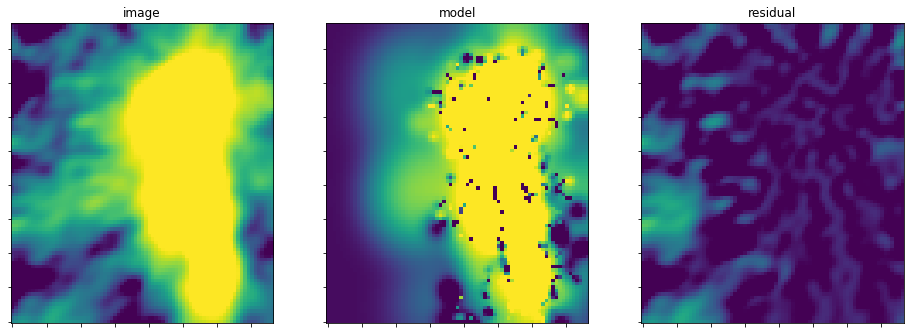

In [64]:
show(imgs_before_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

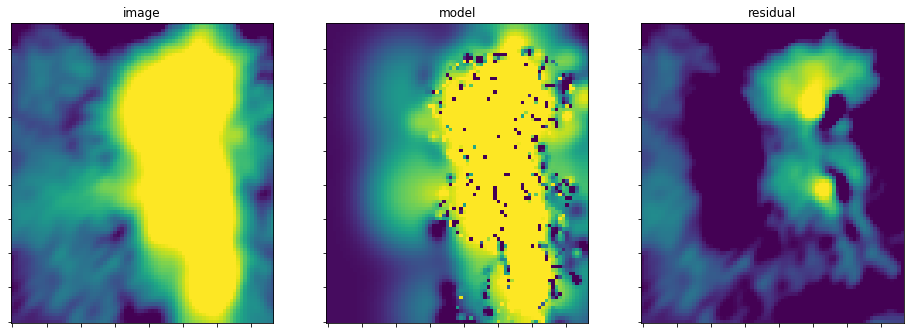

In [65]:
show(imgs_after_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

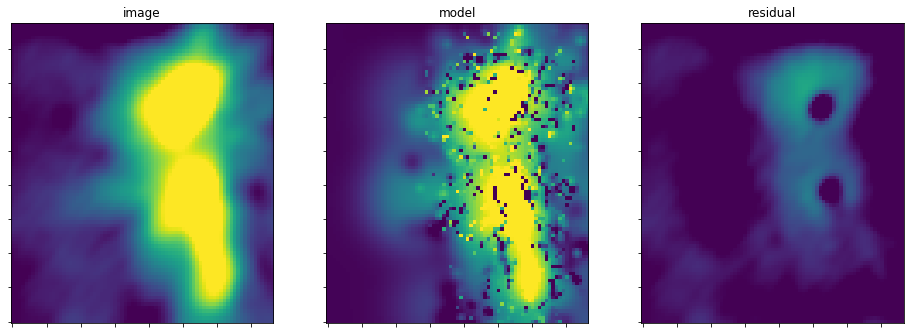

In [66]:
show(imgs_after2_b6, vmin=-0.001, vmax=0.3, zoom=0.2)

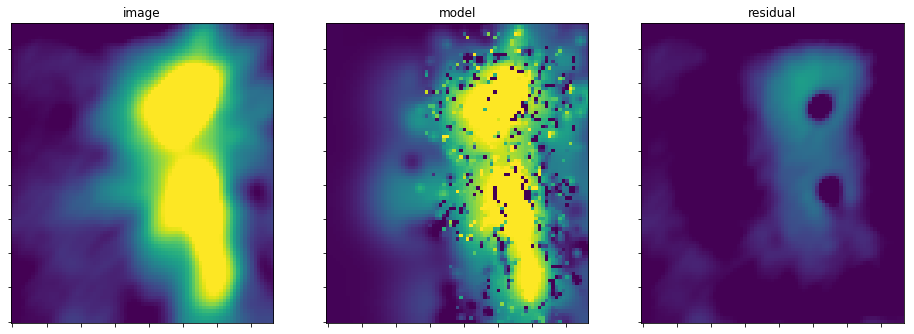

In [67]:
show(imgs_after3_b6, vmin=-0.001, vmax=0.3, zoom=0.2)

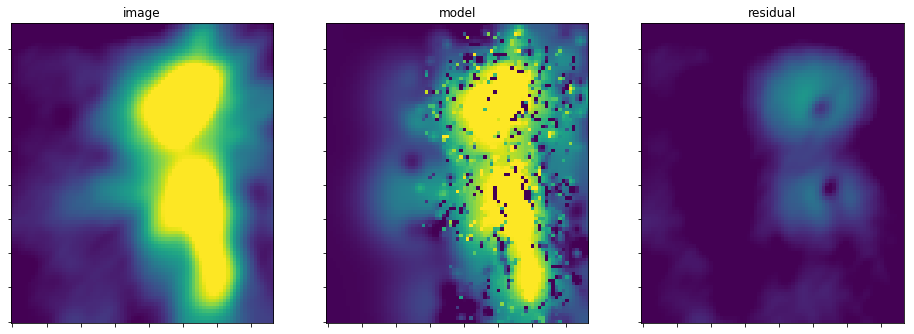

In [68]:
show(imgs_after4_b6, vmin=-0.001, vmax=0.3, zoom=0.2)

In [ ]:
show(imgs_after5_b6, vmin=-0.001, vmax=0.3, zoom=0.2)

In [ ]:
show(imgs_after6_b6, vmin=-0.001, vmax=0.3, zoom=0.2)

Calculate peak to RMS:

In [ ]:
from astropy import stats

In [ ]:
for imgs in (imgs_before_b6, imgs_after_b6, imgs_after2_b6, imgs_after3_b6, imgs_after4_b6, imgs_after5_b6, imgs_after6_b6):
    rms = np.nanstd(imgs['residual'].value*u.Jy/u.beam) # residual has bad header units
    peak = np.nanmax(imgs['image'].quantity)
    rms2 = stats.mad_std(imgs['image'].quantity, ignore_nan=True)
    beam = imgs['image'].beam
    print(f"peak/rms={peak/rms:6.1f}, peak/mad={peak/rms2:6.1f}, peak={peak:0.3f}, rms={rms:0.5f}, mad={rms2:0.5f},"
          f" beam={beam.major:0.2f}x{beam.minor:0.2f}")

Examine the phases: this uses `casatools` (which is only available as a beta library from an NRAO site) to load the table and plot some simple phase information.

In [ ]:
import casatools
tb = casatools.table()

# this creates a "context manager" for the table tool that automatically handles tb.open/tb.close operations
class CasaTable(object):
    def __init__(self, file_name):
        self.tb = tb
        self.file_obj = tb.open(file_name)
    def __enter__(self):
        return self.tb
    def __exit__(self, type, value, traceback):
        self.tb.close()

In [ ]:
with CasaTable('../W51-E_B6_uid___A001_X1296_X215_continuum_merged_phase1_int.cal') as tb:
    print(tb.colnames())
    data = tb.getcol('CPARAM')
    time = tb.getcol('TIME')
    antenna1 = tb.getcol('ANTENNA1')
    antenna2 = tb.getcol('ANTENNA2')
    obsid = tb.getcol('OBSERVATION_ID')
    spwid = tb.getcol('SPECTRAL_WINDOW_ID')

In [ ]:
# data are complex numbers; we're interested in the phase angle
angle = np.angle(data) * 180/np.pi

Plot the phase angle correction from the calibration table vs. entry number.  This allows us to see the typical phase correction split by observation ID rather than by time, since it's very hard to see anything in the angle vs. time plot when multiple independent observations are involved.

In [ ]:
uobsids = np.unique(obsid)
nobsids = len(uobsids)
print(nobsids)

In [ ]:
pl.plot(angle[:,0,(antenna1 == 0) & (spwid%13==0)].T, marker='.', linestyle='none')
pl.plot(angle[:,0,(antenna1 == 0) & (spwid%13==1)].T, marker='.', linestyle='none')

In [ ]:
pl.plot(angle[:,0,(antenna1 == 2) & (spwid%13==3)].T, marker='.', linestyle='none')

In [ ]:
uantid = np.unique(antenna1)
nants = len(uantid)
print(nants)

In [ ]:
anglecube = angle.reshape([2,1,antenna1.size//nants,nants])

This creates a "waterfall plot" of scan number on the y-axis vs antenna number on the x-axis.  You can then see the breakdown by what looks like 7m (lots of scans, few antennae), TM1 (medium # of scans) and TM2 (few scans)

In [ ]:
pl.imshow(anglecube[0,0,:,:], aspect=anglecube.shape[3]/anglecube.shape[2])

Because this is a live CASA notebook, we can do a gaincal with amplitude just to see what's going on.

However, I don't recommend this because gaincal takes too long.

In [9]:
from spectral_cube import SpectralCube
mod = SpectralCube.read('W51-E_B6_uid___A001_X1296_X215_continuum_merged_7M12M_robust0_selfcal1.model.tt0', format='casa_image')

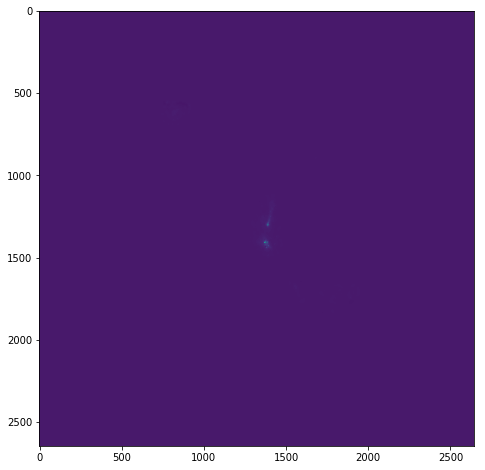

In [10]:
mod[0].quicklook()